# Calculation

In [44]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from manim import *
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [45]:
g=6.6740e-11
m_nd=1.989e+30 #kg Solar Mass
r_nd=5.326e+12 #m Distance between bodies
v_nd=30000 #m/s Velocity of Terra wrt Sol, relative
t_nd=79.91*365*24*3600*0.51 #s Alpha's Centauri's orbit
# Constants
K1=g*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

In [46]:
#Define masses
m1=1.1 #AC A
m2=0.907
m3=1.0

#initial position vectors
r1=[-0.5,0,0]
r2=[0.5,0,0]
r3=[0,1,0]

v1=[0.01,0.01,0] 
v2=[-0.05,0,-0.1]
v3=[0,-0.01,0]

max_orbital_period = 38
time_gap = 1000

time_span=np.linspace(0,max_orbital_period,time_gap)

In [47]:
#Convert pvectors to arrays
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")
r3=np.array(r3,dtype="float64")

#Find velocity of centroids
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")
v3=np.array(v3,dtype="float64")

# Three body Centroid data
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
# velocity of three centroids
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

In [48]:
def ThreeBodyEquations(w, t, G, m1, m2, m3):
    r1 = w[:3]
    r2 = w[3:6]
    r3 = w[6:9]
    v1 = w[9:12]
    v2 = w[12:15]
    v3 = w[15:18]
    r12 = sp.linalg.norm(r2 - r1)
    r13 = sp.linalg.norm(r3 - r1)
    r23 = sp.linalg.norm(r3 - r2)

    dv1bydt = K1 * m2 * (r2 - r1) / r12 ** 3 + K1 * m3 * (r3 - r1) / r13 ** 3
    dv2bydt = K1 * m1 * (r1 - r2) / r12 ** 3 + K1 * m3 * (r3 - r2) / r23 ** 3
    dv3bydt = K1 * m1 * (r1 - r3) / r13 ** 3 + K1 * m2 * (r2 - r3) / r23 ** 3
    dr1bydt = K2 * v1
    dr2bydt = K2 * v2
    dr3bydt = K2 * v3
    r12_derivs = np.concatenate((dr1bydt, dr2bydt))
    r_derivs = np.concatenate((r12_derivs, dr3bydt))
    v12_derivs = np.concatenate((dv1bydt, dv2bydt))
    v_derivs = np.concatenate((v12_derivs, dv3bydt))
    derivation = np.concatenate((r_derivs, v_derivs))
    return derivation

In [49]:
#Parameters
init_params=np.array([r1,r2,r3,v1,v2,v3])
init_params=init_params.flatten()
threeBodyEquations=sp.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(g,m1,m2,m3))

r1_sol=threeBodyEquations[:,:3]
r2_sol=threeBodyEquations[:,3:6]
r3_sol=threeBodyEquations[:,6:9]

In [50]:
r1_x,r1_y,r1_z = r1_sol[:,0],r1_sol[:,1],r1_sol[:,2]
r2_x,r2_y,r2_z = r2_sol[:,0],r2_sol[:,1],r2_sol[:,2]
r3_x,r3_y,r3_z = r3_sol[:,0],r3_sol[:,1],r3_sol[:,2]

# Plotting points using manim

In [51]:
x_lim = []
y_lim = []
for i in r1_x,r2_x,r3_x:
    x_lim.append(np.max(i))
    x_lim.append(np.min(i))
for i in r1_y,r2_y,r3_y:
    y_lim.append(np.max(i))
    y_lim.append(np.min(i))
print(max(x_lim),min(x_lim))
print(max(y_lim),min(y_lim))

1.4137529691603463 -6.0682646215591065
4.110564416321147 -6.863819124758197


In [52]:
len(r1_x)

1000

# Matplotlib for fast rendering

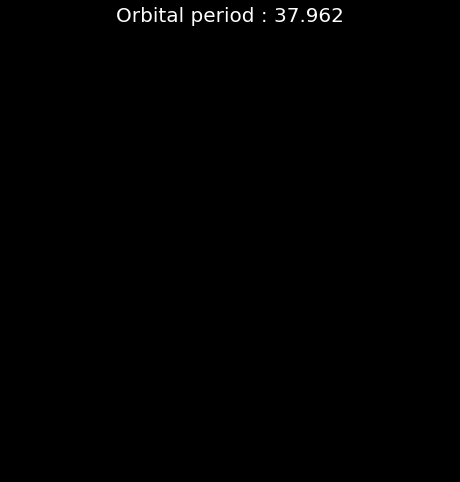

In [53]:
def animate(i):
    ln1.set_data([r1_x[i]], [r1_y[i]])
    ln2.set_data([r2_x[i]], [r2_y[i]])
    ln3.set_data([r3_x[i]], [r3_y[i]])
    text.set_text(f"Orbital period : {(i/time_gap)*max_orbital_period:.3f}")
    
plt.style.use('dark_background')
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')

ln1, = plt.plot([], [], 'ro', lw=4, markersize=9)
ln2, = plt.plot([], [], 'bo', lw=4, markersize=9)
ln3, = plt.plot([], [], 'go', lw=4, markersize=9)

text = plt.text(0, 3.25, 'asdasd', fontsize=20, ha='center')

ax.set_ylim(-3, 3)
ax.set_xlim(-6,6)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('3_body.gif',writer='pillow',fps=30)

# Manim takes approx 4 hours to render so use matplotlib

# Manim for beautiful rendering 

In [ ]:
%%manim -qh -v WARNING CreateGraph

class CreateGraph(Scene):
    def construct(self):
        config.max_files_cached = -1
        #axes = Axes(
        #    x_range=[-3, 3, 0.5],
        #    y_range=[-3, 3, 0.5],
        #)
        dot1 = Dot([r1_x[0],r1_y[0],0],radius=0.115,color=RED)
        dot2 = Dot([r2_x[0],r2_y[0],0],radius=0.115,color=GREEN)
        dot3 = Dot([r3_x[0],r3_y[0],0],radius=0.115,color=BLUE)
        title = Text(
            f"Orbital Period : ",
            font_size=35
        )
        title.to_edge(UP)
        period = Text(f"{0/700:0.3}",font_size=35)
        period.next_to(title)
        self.add(dot1,dot2,dot3,title,period)
        for i in range(0,len(r1_x)):
            dot1.move_to([r1_x[i],r1_y[i],0])
            dot2.move_to([r2_x[i],r2_y[i],0])
            dot3.move_to([r3_x[i],r3_y[i],0])
            #self.wait(0.1)
            period.become(Text(f"{(i/time_gap)*max_orbital_period:.3f}",font_size=35))
            period.next_to(title)
            self.play(Write(period),dot1.animate(),dot2.animate(),dot3.animate(),rate_func=linear)

# Manim with trace

In [ ]:
%%manim -qh -v WARNING Three_body_graph_trace_no_heading

class Three_body_graph_trace_no_heading(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-3, 3, 0.5],
            y_range=[-3, 3, 0.5],
        )
        dot1 = Dot([r1_x[0],r1_y[0],0],radius=0.115,color=RED)
        dot2 = Dot([r2_x[0],r2_y[0],0],radius=0.115,color=GREEN)
        dot3 = Dot([r3_x[0],r3_y[0],0],radius=0.115,color=BLUE)
        path1 = VMobject(color=RED)
        path2 = VMobject(color=GREEN)
        path3 = VMobject(color=BLUE)
        path1.set_points_as_corners([dot1.get_center(), dot1.get_center()])
        path2.set_points_as_corners([dot2.get_center(), dot2.get_center()])
        path3.set_points_as_corners([dot3.get_center(), dot3.get_center()])
 
        self.add(dot1,dot2,dot3,path1,path2,path3)
        for i in range(0,len(r1_x)):
            dot1.move_to([r1_x[i],r1_y[i],0])
            previous_path1 = path1.copy()
            previous_path1.add_points_as_corners([dot1.get_center()])
            path1.become(previous_path1)
            dot2.move_to([r2_x[i],r2_y[i],0])
            previous_path2 = path2.copy()
            previous_path2.add_points_as_corners([dot2.get_center()])
            path2.become(previous_path2)
            dot3.move_to([r3_x[i],r3_y[i],0])
            previous_path3 = path3.copy()
            previous_path3.add_points_as_corners([dot3.get_center()])
            path3.become(previous_path3)
            #self.wait(0.1)

            self.play(dot1.animate(),dot2.animate(),dot3.animate(),path1.animate(),path2.animate(),path3.animate(),rate_func=linear)